# 1) Import libraries

In [1]:
import pandas as pd
import os
import requests
import io
import numpy as np
import datetime
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings

# 2) Import Data
## 2.1) Set Folder Path

In [2]:
PATH = 'C:\\Users\\AgaPakos\\Documents\\UE\\ERASMUS\\Bolonia\\STUDY\\Machine Learning Systems for Data Science - Systems and Algorithms for Data Science\\covid19\\python_files\\data'

# for Aga ;) 
PATH_A = 'C:\\Users\\AgaPakos\\Documents\\UE\\ERASMUS\\Bolonia\\STUDY\\Machine Learning Systems for Data Science - Systems and Algorithms for Data Science\\covid19\\python_files\\data'
print(os.getcwd())

C:\Users\AgaPakos\Documents\UE\ERASMUS\Bolonia\STUDY\Machine Learning Systems for Data Science - Systems and Algorithms for Data Science\covid19\python_files


## 2.2) Import air quality data for New York, Milan and Tokyo from data folder

Here we import the air quality data for the three cities from our folder path. We rename the pollutants by removing a space so they work seamlessly in our code. We then get an overview of our data: In the describe() function we set 'datetime_is_numeric = True', so datetime data is treated as numeric rather than categorical, which also silences a Python warning.

In [3]:
# 2.2.1) For New York
ny_air_PATH = os.path.join(PATH, 'new-york-air-quality.csv')
ny_air = pd.read_csv(ny_air_PATH, parse_dates = ['date'])
ny_air.rename(columns = {' pm25': 'pm25_ny', ' o3': 'o3_ny', ' no2': 'no2_ny',\
                         ' co': 'co_ny'}, inplace = True)

# Overview
ny_air.info()
ny_air.describe(include = 'all', datetime_is_numeric = True) # 'datetime_is_numeric = True' is used to silence a known Python warning
print(ny_air.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3207 non-null   datetime64[ns]
 1   pm25_ny  3207 non-null   object        
 2   o3_ny    3207 non-null   object        
 3   no2_ny   3207 non-null   object        
 4   co_ny    3207 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 125.4+ KB
        date pm25_ny o3_ny no2_ny co_ny
0 2022-01-11      40    28     20     3
1 2022-02-11      45    23     25     3
2 2022-03-11      53    17     26     4
3 2022-04-11      47    24     10     1
4 2022-05-11      31    21      6     1


C:\Users\AgaPakos\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning:

Parsing '13/11/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\AgaPakos\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning:

Parsing '14/11/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\AgaPakos\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning:

Parsing '15/11/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\AgaPakos\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning:

Parsing '17/11/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\AgaPakos\anaconda3\lib\site-packages\pandas\io\parsers\base_parser.py:1070: UserWarning:

Parsing '18/11/2022' 

In [4]:
# 2.2.2) For Milan
ml_air_PATH = os.path.join(PATH, 'milano-senato, lombardia, italy-air-quality.csv')
ml_air = pd.read_csv(ml_air_PATH, parse_dates = ['date'])
ml_air.rename(columns = {' pm25': 'pm25_ml', ' pm10': 'pm10_ml', ' no2': 'no2_ml',\
                         ' co': 'co_ml'}, inplace = True)

# Overview
ml_air.info()
ml_air.describe(include = 'all', datetime_is_numeric = True) # 'datetime_is_numeric = True' is used to silence a known Python warning
print(ml_air.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2860 non-null   datetime64[ns]
 1   pm25_ml  2860 non-null   object        
 2   pm10_ml  2860 non-null   object        
 3   no2_ml   2860 non-null   object        
 4   co_ml    2860 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 111.8+ KB
        date pm25_ml pm10_ml no2_ml co_ml
0 2022-12-01     134      34     27      
1 2022-12-02      82      24     23      
2 2022-12-03      76      13     20      
3 2022-12-04      53      16     22      
4 2022-12-05      50      36     39      


In [5]:
# 2.2.3) For Tokyo
tk_air_PATH = os.path.join(PATH, 'hibiyakoen,-chiyoda, tokyo, japan-air-quality.csv')
tk_air = pd.read_csv(tk_air_PATH, parse_dates = ['date'])
tk_air.rename(columns = {' pm25': 'pm25_tk', ' pm10': 'pm10_tk', ' o3': 'o3_tk',\
                         ' no2': 'no2_tk', ' so2': 'so2_tk', ' co': 'co_tk'}, inplace = True)

# Overview
tk_air.info()
tk_air.describe(include = 'all', datetime_is_numeric = True) # 'datetime_is_numeric = True' is used to silence a known Python warning
print(tk_air.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3271 non-null   datetime64[ns]
 1   pm25_tk  3271 non-null   object        
 2   pm10_tk  3271 non-null   object        
 3   o3_tk    3271 non-null   object        
 4   no2_tk   3271 non-null   object        
 5   so2_tk   3271 non-null   object        
 6   co_tk    3271 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 179.0+ KB
        date pm25_tk pm10_tk o3_tk no2_tk so2_tk co_tk
0 2022-12-01      25       9    19     15      1     2
1 2022-12-02      29      11           18            4
2 2022-12-03      36      14    15     16      1     4
3 2022-12-04      46       9    17     16      1     2
4 2022-12-05      29       7    14     17            3


## 2.3) Import New York health data from Github repository and do a quality check

Here we import the health data for New York from a Github repository, using request package and the 'raw' version of the URL.

In [6]:
# 2.3.1) Import New York health data from Github repository
url_ny_health = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv'
download_ny_health = requests.get(url_ny_health).content
ny_health = pd.read_csv(io.StringIO(download_ny_health.decode('utf-8')), sep = ',', parse_dates = ['date_of_interest'])
ny_health.rename(columns = {'DEATH_COUNT': 'death_ny'}, inplace = True)

# Overview
ny_health.info()
ny_health.describe(include = 'all', datetime_is_numeric = True) # 'datetime_is_numeric = True' is used to silence a known Python warning
print(ny_health.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 67 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date_of_interest                 1053 non-null   datetime64[ns]
 1   CASE_COUNT                       1053 non-null   int64         
 2   PROBABLE_CASE_COUNT              1053 non-null   int64         
 3   HOSPITALIZED_COUNT               1053 non-null   int64         
 4   death_ny                         1053 non-null   int64         
 5   PROBABLE_DEATH_COUNT             1053 non-null   int64         
 6   CASE_COUNT_7DAY_AVG              1053 non-null   int64         
 7   ALL_CASE_COUNT_7DAY_AVG          1053 non-null   int64         
 8   HOSP_COUNT_7DAY_AVG              1053 non-null   int64         
 9   DEATH_COUNT_7DAY_AVG             1053 non-null   int64         
 10  ALL_DEATH_COUNT_7DAY_AVG         1053 non-null   int64      

As we can see, the data includes separate 'CASE_COUNT' variables for the districts of New York city. In the following cell, we check if the total death count is really the sum of the district death counts. We see that this is not the case on two dates. However, these two dates do not fall into our focus period, and can therefore be ignored.

In [7]:
# 2.3.2) Compare the confirmed death count of all districts with the aggregate variable (quality check)
ny_health_death_sum = pd.DataFrame({'death_ny_sum': ny_health.loc[:, ['BX_DEATH_COUNT', 'BK_DEATH_COUNT', 'MN_DEATH_COUNT',\
                                                                   'QN_DEATH_COUNT', 'SI_DEATH_COUNT']].sum(axis = 1)})
ny_health_death_total = ny_health[['date_of_interest', 'death_ny']]
ny_health_death_merged = pd.concat([ny_health_death_total, ny_health_death_sum], axis = 1)

print(ny_health_death_merged['death_ny'].equals(ny_health_death_merged['death_ny_sum']))

# We do not have a perfect match. However, the mismatch is negligible as it does not fall into the period (2020-03-03 
# - 2020-06-26) we are focusing on:
ny_health_death_merged.loc[ny_health_death_merged['death_ny'] != ny_health_death_merged['death_ny_sum']]

False


,date_of_interest,death_ny,death_ny_sum
415,2021-04-19,42,41
653,2021-12-13,21,20


The quality check showed that death_ny can be used for our study. We now throw out all the other variables and keep only date_of_interest and death_ny.

In [8]:
# 2.3.3) The quality check showed that death_ny can be used. Therefore: Keep only date_of_interest and death_ny
ny_health = ny_health.loc[:, ['date_of_interest', 'death_ny']]

## 2.4) Import Milan health data from Github repository and derive a proxy for the death count

The Milan health data is also imported from a Github repository, using the request package and the 'raw' version of the URL. However, we have a separate CSV file for every day, and each CSV file shows data for all the provinces of Italy. The approach is to loop through every day in our focus period, create an URL by concatenation, and then extract the value under for the 'Milano' row under the 'totale_casi' column. This is achieved by string splitting the content of our request.get() output.

In [9]:
# 2.4.1) Import Milan health data from Github repository (takes around 40sec to run)

# Create a date range for concatenation (below) and initialize the case_count list and the ml_health dictionary
# Note: We start on 2nd March 2020 in order to derive the growth (= new cases) for 3rd March 2020.
date_range_strings = pd.date_range(start = '20200302', end = '20200626', freq = 'D').strftime('%Y%m%d')
case_count_list = []
ml_health = {'date': [], 'cum_case_ml': []}

# Loop through list of URLs and create a dictionary with key = 'date' and value = 'case'
for i in date_range_strings:
    
    # Create URL by string concatenation
    url_ml_health = ('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-'\
                     + i + '.csv') 
    download_ml_health = requests.get(url_ml_health).content
    
    # Use string splits to single out the row for 'Milano' and the column 'totale_casi'
    cum_case_count = str(download_ml_health).split('Milano')[1].split(',\\n')[0].split(',')[4] 
    
    # Append the dictionary with the new key-value pair
    ml_health['date'].append(i)
    ml_health['cum_case_ml'].append(cum_case_count)
    
print(ml_health)

{'date': ['20200302', '20200303', '20200304', '20200305', '20200306', '20200307', '20200308', '20200309', '20200310', '20200311', '20200312', '20200313', '20200314', '20200315', '20200316', '20200317', '20200318', '20200319', '20200320', '20200321', '20200322', '20200323', '20200324', '20200325', '20200326', '20200327', '20200328', '20200329', '20200330', '20200331', '20200401', '20200402', '20200403', '20200404', '20200405', '20200406', '20200407', '20200408', '20200409', '20200410', '20200411', '20200412', '20200413', '20200414', '20200415', '20200416', '20200417', '20200418', '20200419', '20200420', '20200421', '20200422', '20200423', '20200424', '20200425', '20200426', '20200427', '20200428', '20200429', '20200430', '20200501', '20200502', '20200503', '20200504', '20200505', '20200506', '20200507', '20200508', '20200509', '20200510', '20200511', '20200512', '20200513', '20200514', '20200515', '20200516', '20200517', '20200518', '20200519', '20200520', '20200521', '20200522', '20200

Looking at the metadata (Source: https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md), the above 
output for 'totale_casi' only gives us the 'Total amount of positive cases', which is a cumulative sum. We therefore have to take the first difference to obtain the new cases per day. Afterwards, we multiply the number of cases by the case fatality rate (CFR) to obtain a proxy for the death count. The CFR for Milan during February-May 2020 has been calculated as 17.3%. (Source: https://epiprev.it/documenti/downloadfile.php?fileid=29bf488c8dae81773eee15a8497d89b5cdec4f84)

In [10]:
# 2.4.2) Create a proxy for the death count by multiplying the daily cases with the case fatality rate (CFR)

# 2.4.2.1) Convert the ml_health dictionary into a dataframe
ml_health = pd.DataFrame.from_dict(ml_health)

# 2.4.2.2) Take the first difference to obtain the new cases per day
ml_health['case_ml'] = ml_health['cum_case_ml'].astype(pd.Int64Dtype()).diff(periods = 1)

# 2.4.2.3) Multiply the number of cases by a CFR of 17.3%
cfr_ml = 0.173
ml_health['death_ml'] = (ml_health['case_ml'] * cfr_ml).round().astype(pd.Int64Dtype())
ml_health.head()

,date,cum_case_ml,case_ml,death_ml
0,20200302,58,<NA>,<NA>
1,20200303,93,35,6
2,20200304,145,52,9
3,20200305,197,52,9
4,20200306,267,70,12


## 2.5) Import Tokyo health data from Github repository

For Tokyo, we are using again the 'raw' version of the data, which is provided by the Tokyo Metropolitan Government on Github. The data is stored in the JSON format: We use read_json() from pandas and change the parameters of the function to obtain a list of dictionaries, which can easily be converted to a dataframe using the DataFrame() function from pandas.

In [11]:
url_tk_health = 'https://raw.githubusercontent.com/tokyo-metropolitan-gov/covid19/development/data/deaths.json'

# The output of the following pd.json_read() command is a list of dictionaries:
tk_health = pd.read_json(url_tk_health, orient = 'index', typ = 'series')['data']

# Turn the list of dictionaries into a dataframe 
tk_health = pd.DataFrame(tk_health)
tk_health.rename(columns = {'count': 'death_tk'}, inplace = True)
tk_health['death_date'] = pd.to_datetime(tk_health['death_date'],  format = '%Y-%m-%d')

# Overview
tk_health.info()
tk_health.describe(include = 'all', datetime_is_numeric = True) # 'datetime_is_numeric = True' is used to silence a known Python warning
print(tk_health.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   death_date  1060 non-null   datetime64[ns]
 1   death_tk    1060 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 16.7 KB
  death_date  death_tk
0 2020-02-26         1
1 2020-02-27         0
2 2020-02-28         0
3 2020-02-29         0
4 2020-03-01         0


# 3) Process and merge data
## 3.1) Process data

In the next steps, we define and apply two functions which prepare all our dataframes, before merging them to our final dataframe.

The function convert_sort_date_rows(), creates an index from the date column, converts the date column to a 'datetime64[ns]' data type and sorts the data. We also obtain a print of the date range covered by our data.

In [12]:
# 3.1.1) Convert the date column and sort the data by dates; Print the date range

def convert_sort_date_rows(data, date_column_name):
    
    # Use date_column_name to create a column index number
    date_column_index = data.columns.get_loc(date_column_name)
    
    # Convert date column to date-format without loosing the Dtype 'datetime64[ns]'
    data.iloc[:, date_column_index] = pd.to_datetime(data.iloc[:, date_column_index])
    
    # Sort by date_column_name and print the date range
    data = data.sort_values(by = date_column_name)
    date_range_min = min(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    date_range_max = max(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    print(f'Date range: {date_range_min}, {date_range_max}')
    
    return(data)

In [13]:
# 3.1.2) Apply the convert_sort_date_rows() function to air data
print("New York air quality data:")
ny_air = convert_sort_date_rows(data = ny_air, date_column_name = 'date')
print("Tokyo air quality data:")
tk_air = convert_sort_date_rows(data = tk_air, date_column_name = 'date')
print("Milan air quality data:")
ml_air = convert_sort_date_rows(data = ml_air, date_column_name = 'date')

New York air quality data:
Date range: 2014-01-01, 2022-12-11
Tokyo air quality data:
Date range: 2014-01-02, 2022-12-31
Milan air quality data:
Date range: 2014-10-05, 2022-12-28


In [14]:
# 3.1.3) Apply the convert_sort_date_rows() function to health data
print("New York health data:")
ny_health = convert_sort_date_rows(data = ny_health, date_column_name = 'date_of_interest')
print("Tokyo health data:")
tk_health = convert_sort_date_rows(data = tk_health, date_column_name = 'death_date')
print("Milan health data:")
ml_health = convert_sort_date_rows(data = ml_health, date_column_name = 'date')
# We can see that the Tokyo date range includes the other. We therefore need an outer merge in 3.2)

New York health data:
Date range: 2020-02-29, 2023-01-16
Tokyo health data:
Date range: 2020-02-26, 2023-01-20
Milan health data:
Date range: 2020-03-02, 2020-06-26


The function add_missing_date_rows() finds missing rows (= dates) in our data and adds them back, which means that some rows are created which show missing values on the other columns. We also get an output of the missing rows before and after the fix.

In [15]:
# 3.1.4) Find missing date rows in both air and health and add the missing rows

def add_missing_date_rows(data, date_column_name):
    
    # Before dropping the date_column_name (see below): Use it to create a column index number and the date range min/max
    date_column_index = data.columns.get_loc(date_column_name)
    date_range_min = min(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    date_range_max = max(data.iloc[:, date_column_index].dt.strftime('%Y-%m-%d'))
    data = data.set_index(date_column_name, drop = True) # Set date as index; the original date_column_name is dropped here
    
    # Find missing date rows
    data.index = pd.to_datetime(data.index) # format to date time object
    date_missing_before = pd.date_range(start = str(date_range_min), end = str(date_range_max)).difference(data.index)
    print(str(date_missing_before.size) + " date rows are missing (before fix)")
    print(date_missing_before) 
    
    # Add the missing date rows
    date_range = pd.date_range(str(date_range_min), str(date_range_max)) # creates perfect date range
    data.index = pd.DatetimeIndex(data.index)
    data = data.reindex(date_range)
    date_missing_after = pd.date_range(start = str(date_range_min), end = str(date_range_max)).difference(data.index)
    print(str(date_missing_after.size) + " date rows are missing (after fix)")
    print(date_missing_after)
    
    data.reset_index(inplace = True, drop = False) # needed to undo the index setting above; inplace = True means the 
    # original air dataframe is targeted; drop = False retrieves the original date column.
    data.rename(columns={'index': date_column_name}, inplace = True) # returning to original column name, so this cell can be re-run easier
    
    return(data)


In [16]:
# 3.1.5) Apply the add_missing_date_rows() function to air data
print("New York air quality data:")
ny_air = add_missing_date_rows(data = ny_air, date_column_name = 'date')

New York air quality data:
60 date rows are missing (before fix)
DatetimeIndex(['2014-12-29', '2014-12-30', '2014-12-31', '2016-01-01',
               '2017-01-28', '2017-06-09', '2017-07-09', '2017-08-09',
               '2018-12-31', '2019-01-11', '2019-02-11', '2019-07-10',
               '2019-08-10', '2019-09-10', '2019-10-10', '2019-10-13',
               '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17',
               '2019-10-18', '2019-10-19', '2019-10-20', '2019-10-21',
               '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-26', '2019-10-27', '2019-10-28', '2019-10-29',
               '2019-10-30', '2019-10-31', '2019-11-10', '2019-12-10',
               '2019-12-30', '2019-12-31', '2020-03-30', '2022-01-12',
               '2022-02-12', '2022-03-12', '2022-04-12', '2022-05-12',
               '2022-06-12', '2022-07-12', '2022-08-12', '2022-09-12',
               '2022-10-12', '2022-11-12', '2022-11-21', '2022-11-22',
            

In [17]:
print("Tokyo air quality data:")
tk_air = add_missing_date_rows(data = tk_air, date_column_name = 'date')

Tokyo air quality data:
15 date rows are missing (before fix)
DatetimeIndex(['2014-01-24', '2014-01-25', '2014-12-28', '2014-12-29',
               '2014-12-30', '2015-01-10', '2017-09-07', '2017-09-08',
               '2017-09-09', '2019-12-30', '2020-03-30', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-09-11'],
              dtype='datetime64[ns]', freq=None)
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [18]:
print("Milan air quality data:")
ml_air = add_missing_date_rows(data = ml_air, date_column_name = 'date')

Milan air quality data:
147 date rows are missing (before fix)
DatetimeIndex(['2014-12-29', '2014-12-30', '2015-12-30', '2017-03-10',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10',
               ...
               '2021-01-02', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-05-03', '2021-05-04', '2021-10-14', '2022-07-19',
               '2022-07-20', '2022-07-31'],
              dtype='datetime64[ns]', length=147, freq=None)
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [19]:
# 3.1.6) Apply the add_missing_date_rows() function to health data
print("New York health data:")
ny_health = add_missing_date_rows(data = ny_health, date_column_name = 'date_of_interest')

New York health data:
0 date rows are missing (before fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [20]:
print("Tokyo health data:")
tk_health = add_missing_date_rows(data = tk_health, date_column_name = 'death_date')

Tokyo health data:
0 date rows are missing (before fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [21]:
print("Milan health data:")
ml_health = add_missing_date_rows(data = ml_health, date_column_name = 'date')

Milan health data:
0 date rows are missing (before fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')
0 date rows are missing (after fix)
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


## 3.2) Merge data from air and health into the final dataframe; process the data

In [22]:
# 3.2.1) Outer merge all air data sets by their date columns
air = pd.merge(pd.merge(ny_air, tk_air, how = 'outer', on = 'date'), ml_air, how = 'outer', on = 'date')

In [23]:
# 3.2.2) Outer merge all health data sets by their date columns
health = pd.merge(pd.merge(tk_health, ny_health, how = 'outer', left_on = 'death_date', right_on = 'date_of_interest'),\
                  ml_health, how = 'outer', left_on = 'death_date', right_on = 'date')

In [24]:
# 3.2.3) Outer merge air and health by their date columns; change all variables of interest to Dtype 'int64'
df_merged = pd.merge(air, health, how = 'outer', left_on = 'date', right_on = 'death_date')
print(df_merged.iloc[0, [0, 5]]) # to check that the merged dataframe starts from the first possible date of both air and health
print(df_merged.iloc[-1, [0, 5]]) # to check that the merged dataframe ends on the last possible date of both air and health
air_date_range_min = min(air.loc[:, 'date'].dt.strftime('%Y-%m-%d'))
air_date_range_max = max(air.loc[:, 'date'].dt.strftime('%Y-%m-%d'))
health_date_range_min = min(health.loc[:, 'death_date'].dt.strftime('%Y-%m-%d'))
health_date_range_max = max(health.loc[:, 'death_date'].dt.strftime('%Y-%m-%d'))
print(f'Date range for air: {air_date_range_min}, {air_date_range_max}')
print(f'Date range for health: {health_date_range_min}, {health_date_range_max}')
# The date range matches.
print(df_merged.head())

# 3.2.4) Create date_merged column which combines the entries from the date column of 
df_merged['date_merged'] = df_merged['date_x'] #
df_merged['date_merged'] = df_merged.date_merged.combine_first(df_merged.death_date)

# 3.2.5 Create final dataframe - co_ml and co_ny are excluded because they do not show any or too little data in the time frame
set_start_date = '2020-03-03'
set_end_date = '2020-06-26'
index_start_date = df_merged.loc[df_merged.date_merged == set_start_date].index[0]
index_end_date = df_merged.loc[df_merged.date_merged == set_end_date].index[0]
df_final = df_merged.copy()
df_final = df_final.loc[index_start_date:index_end_date, ['date_merged',\
                                                          'pm25_ny', 'o3_ny', 'no2_ny',\
                                                          'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk', 'co_tk',\
                                                          'pm25_ml', 'pm10_ml', 'no2_ml',\
                                                          'death_ny', 'death_tk', 'death_ml']]

df_final.head()

date_x     2014-01-01 00:00:00
pm25_tk                    NaN
Name: 0, dtype: object
date_x     NaT
pm25_tk    NaN
Name: 3306, dtype: object
Date range for air: 2014-01-01, 2022-12-31
Date range for health: 2020-02-26, 2023-01-20
      date_x pm25_ny o3_ny no2_ny co_ny pm25_tk pm10_tk o3_tk no2_tk so2_tk  \
0 2014-01-01      57                        NaN     NaN   NaN    NaN    NaN   
1 2014-01-02      81                                 13           18          
2 2014-01-03      51                         31      14           19          
3 2014-01-04      30                         38       5            9          
4 2014-01-05      46                         18       7           19          

   ... no2_ml co_ml death_date death_tk date_of_interest death_ny  date_y  \
0  ...    NaN   NaN        NaT      NaN              NaT      NaN     NaT   
1  ...    NaN   NaN        NaT      NaN              NaT      NaN     NaT   
2  ...    NaN   NaN        NaT      NaN              NaT      Na

,date_merged,pm25_ny,o3_ny,no2_ny,pm25_tk,pm10_tk,o3_tk,no2_tk,so2_tk,co_tk,pm25_ml,pm10_ml,no2_ml,death_ny,death_tk,death_ml
2253,2020-03-03,37,,10,32,14,22,20,1,3,70,27,41,0.0,0.0,6
2254,2020-03-04,13,,8,46,9,33,11,,3,74,25,31,0.0,0.0,9
2255,2020-03-05,35,36,7,32,11,34,12,1,2,65,29,33,0.0,0.0,9
2256,2020-03-06,44,53,13,37,13,32,16,1,2,74,34,38,0.0,0.0,12
2257,2020-03-07,51,34,3,42,14,30,9,,2,91,20,30,0.0,0.0,16


## 3.3) Process final dataframe

In [25]:
# 3.3.1) Rename columns
df_final.rename(columns = {'date_merged': 'date'}, inplace = True)

# 3.3.2) Replace empty values by NaN
df_final = df_final.replace(r'^\s*$', np.nan, regex = True) 

# 3.3.3) Change all variables (except for the date column) to Dtype 'Int64Dtype' - it allows better handling of NaN values
df_final = df_final.astype({'pm25_ny': pd.Int64Dtype(), 'o3_ny': pd.Int64Dtype(), 'no2_ny': pd.Int64Dtype(),\
                        'pm25_tk': pd.Int64Dtype(), 'pm10_tk': pd.Int64Dtype(), 'o3_tk': pd.Int64Dtype(), 'no2_tk': pd.Int64Dtype(), 'so2_tk': pd.Int64Dtype(), 'co_tk': pd.Int64Dtype(),\
                        'pm25_ml': pd.Int64Dtype(), 'pm10_ml': pd.Int64Dtype(), 'no2_ml': pd.Int64Dtype(),\
                        'death_ny': pd.Int64Dtype(), 'death_tk': pd.Int64Dtype(), 'death_ml': pd.Int64Dtype()})

# 3.3.4) Create interpolated versions of our raw variables (linear interpolation to replace NaN values)
# Note: o3_ny cannot be interpolated as it starts with NaN values
df_final[['pm25_ny_ip', 'no2_ny_ip',\
          'pm25_tk_ip', 'pm10_tk_ip', 'o3_tk_ip', 'no2_tk_ip', 'so2_tk_ip', 'co_tk_ip',\
          'pm25_ml_ip', 'pm10_ml_ip', 'no2_ml_ip',\
          'death_ny_ip', 'death_tk_ip', 'death_ml_ip']] = df_final[['pm25_ny', 'no2_ny',\
                                        'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk', 'co_tk',\
                                        'pm25_ml', 'pm10_ml', 'no2_ml',\
                                        'death_ny', 'death_tk', 'death_ml']].astype(float).interpolate(method = 'linear').round(0).astype(pd.Int64Dtype())

In [26]:
# 3.3.5) Create additional log and difference variables - based on both raw and interpolated data

# 3.3.5.1) For the raw variables (with NAs)
df_final[['ln_pm25_ny', 'ln_o3_ny', 'ln_no2_ny',\
            'ln_pm25_tk', 'ln_pm10_tk', 'ln_o3_tk', 'ln_no2_tk', 'ln_so2_tk', 'ln_co_tk',\
            'ln_pm25_ml', 'ln_pm10_ml', 'ln_no2_ml',\
            'ln_death_ny', 'ln_death_tk', 'ln_death_ml']] = np.log(df_final[['pm25_ny', 'o3_ny', 'no2_ny',\
                                                'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk', 'co_tk',\
                                                'pm25_ml', 'pm10_ml', 'no2_ml',\
                                                'death_ny', 'death_tk', 'death_ml']].astype(float)) # warning: log(0) = -Inf
df_final[['d_pm25_ny', 'd_o3_ny', 'd_no2_ny',\
            'd_pm25_tk', 'd_pm10_tk', 'd_o3_tk', 'd_no2_tk', 'd_so2_tk', 'd_co_tk',\
            'd_pm25_ml', 'd_pm10_ml', 'd_no2_ml',\
            'd_death_ny', 'd_death_tk', 'd_death_ml']] = df_final[['pm25_ny', 'o3_ny', 'no2_ny',\
                                                'pm25_tk', 'pm10_tk', 'o3_tk', 'no2_tk', 'so2_tk', 'co_tk',\
                                                'pm25_ml', 'pm10_ml', 'no2_ml',\
                                                'death_ny', 'death_tk', 'death_ml']].astype(pd.Int64Dtype()).diff(periods = 1, axis = 0)

# 3.3.5.2) For all available interpolated variables; 
# Note: Interpolation is not available for o3_ny - see 3.3.4)
df_final[['ln_pm25_ny_ip', 'ln_no2_ny_ip',\
            'ln_pm25_tk_ip', 'ln_pm10_tk_ip', 'ln_o3_tk_ip', 'ln_no2_tk_ip', 'ln_so2_tk_ip', 'ln_co_tk_ip',\
            'ln_pm25_ml_ip', 'ln_pm10_ml_ip', 'ln_no2_ml_ip',\
            'ln_death_ny_ip', 'ln_death_tk_ip', 'ln_death_ml_ip']] = np.log(df_final[['pm25_ny_ip', 'no2_ny_ip',\
                                                'pm25_tk_ip', 'pm10_tk_ip', 'o3_tk_ip', 'no2_tk_ip', 'so2_tk_ip', 'co_tk_ip',\
                                                'pm25_ml_ip', 'pm10_ml_ip', 'no2_ml_ip',\
                                                'death_ny_ip', 'death_tk_ip', 'death_ml_ip']]).astype(float) # warning: log(0) = -Inf
df_final[['d_pm25_ny_ip', 'd_no2_ny_ip',\
            'd_pm25_tk_ip', 'd_pm10_tk_ip', 'd_o3_tk_ip', 'd_no2_tk_ip', 'd_so2_tk_ip', 'd_co_tk_ip',\
            'd_pm25_ml_ip', 'd_pm10_ml_ip', 'd_no2_ml_ip',\
            'd_death_ny_ip', 'd_death_tk_ip', 'd_death_ml_ip']] = df_final[['pm25_ny_ip', 'no2_ny_ip',\
                                            'pm25_tk_ip', 'pm10_tk_ip', 'o3_tk_ip', 'no2_tk_ip', 'so2_tk_ip', 'co_tk_ip',\
                                            'pm25_ml_ip', 'pm10_ml_ip', 'no2_ml_ip',\
                                            'death_ny_ip', 'death_tk_ip', 'death_ml_ip']].astype(pd.Int64Dtype()).diff(periods = 1, axis = 0)

# 3.3.5.3) Replace Inf and -Inf by NaN
df_final.replace([np.inf, -np.inf], np.nan, inplace = True) # replace Inf and -Inf by NaN

C:\Users\AgaPakos\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning:

divide by zero encountered in log

C:\Users\AgaPakos\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:484: RuntimeWarning:

divide by zero encountered in log



## 3.4) View the whole final dataframe

In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 2253 to 2368
Data columns (total 88 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            116 non-null    datetime64[ns]
 1   pm25_ny         114 non-null    Int64         
 2   o3_ny           51 non-null     Int64         
 3   no2_ny          88 non-null     Int64         
 4   pm25_tk         113 non-null    Int64         
 5   pm10_tk         113 non-null    Int64         
 6   o3_tk           114 non-null    Int64         
 7   no2_tk          114 non-null    Int64         
 8   so2_tk          99 non-null     Int64         
 9   co_tk           111 non-null    Int64         
 10  pm25_ml         112 non-null    Int64         
 11  pm10_ml         112 non-null    Int64         
 12  no2_ml          116 non-null    Int64         
 13  death_ny        116 non-null    Int64         
 14  death_tk        116 non-null    Int64         
 15  de

In [28]:
# Display all columns for the remainder of the script
pd.set_option('display.max_columns', 100) 

In [29]:
with pd.option_context('display.max_rows', 100): # change number of rows if needed
   print(df_final)

           date  pm25_ny  o3_ny  no2_ny  pm25_tk  pm10_tk  o3_tk  no2_tk  \
2253 2020-03-03       37   <NA>      10       32       14     22      20   
2254 2020-03-04       13   <NA>       8       46        9     33      11   
2255 2020-03-05       35     36       7       32       11     34      12   
2256 2020-03-06       44     53      13       37       13     32      16   
2257 2020-03-07       51     34       3       42       14     30       9   
...         ...      ...    ...     ...      ...      ...    ...     ...   
2364 2020-06-22       23   <NA>    <NA>       35       17     33      20   
2365 2020-06-23       36     37      14       30       21     23      15   
2366 2020-06-24       47     52       9       40       15     17      15   
2367 2020-06-25       37     44      25       30       37     52      24   
2368 2020-06-26       38     38    <NA>       58       49     49      27   

      so2_tk  co_tk  pm25_ml  pm10_ml  no2_ml  death_ny  death_tk  death_ml  \
2253    

# 4) Descriptive plots
## 4.1) Scatterplots

In [30]:
# 4.1.1) Create a function for scatterplots (with regression line) that allows us to control the range of the x- and y-variable

def scatterplot(df, x_column, y_column, xlim_min = None, xlim_max = None, ylim_min = 1, ylim_max = 590):
        
    # Create temporary dataframe that removes NAs
    df_temp = df.loc[:, [x_column, y_column]].dropna()
    
    # Define xlim_min and xlim_max in case they are not provided
    if xlim_min == None:
        xlim_min = min(df_temp.loc[:, x_column])
    if xlim_max == None:
        xlim_max = max(df_temp.loc[:, x_column])
    
    # Exclude values outside of the limits - this is not needed for the plot, but for the linear regression
    df_temp = df_temp[(df_temp[x_column] >= xlim_min) & (df_temp[x_column] <= xlim_max)\
                      & (df_temp[y_column] >= ylim_min) & (df_temp[y_column] <= ylim_max)]
    
    # Define x and y indices
    x_index = df_temp.columns.get_loc(x_column)
    y_index = df_temp.columns.get_loc(y_column)
    
    # Create scatter plot
    plot = df_temp.plot.scatter(x =  x_column,
                     y =  y_column)
   
    # Create linear regression
    X = df_temp.iloc[:, x_index].values.reshape(-1, 1)
    Y = df_temp.iloc[:, y_index].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.plot(X, Y_pred, color = 'red')
     
    # Add title and axis names
    plt.title(f"Scatter chart:\n {x_column}  vs  {y_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.ylim(ylim_min, ylim_max)
    plt.xlim(xlim_min, xlim_max)
    
    plt.savefig(f"Scatter chart {x_column}  vs  {y_column}.jpg",dpi=300, bbox_inches='tight')
    return(plot)

In [31]:
# 4.1.2) The linear regression in the scatterplot function above shows the following warning when applied to our data:

# 'Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24
# and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.'

# For a better presentation of the plots we are setting off these warnings:
warnings.filterwarnings('ignore')

### 4.1.3) New York

<AxesSubplot:title={'center':'Scatter chart:\n d_no2_ny  vs  death_ny'}, xlabel='d_no2_ny', ylabel='death_ny'>

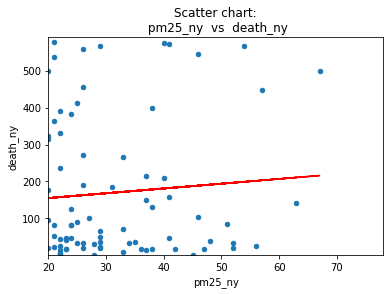

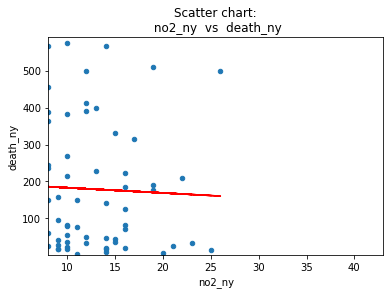

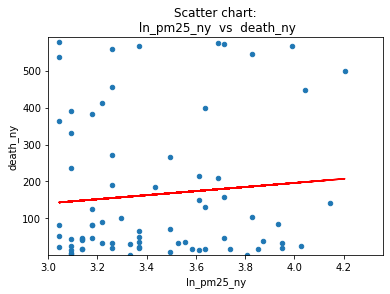

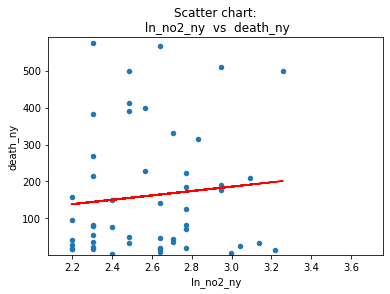

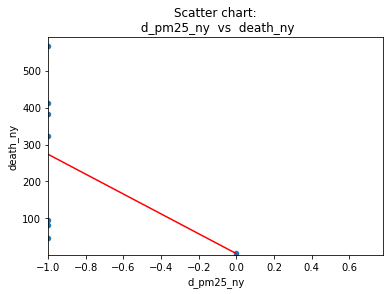

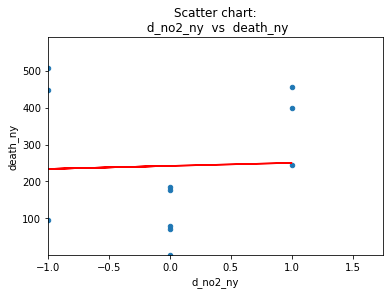

In [32]:
# 4.1.3.1) Deaths vs PM2.5
scatterplot(df_final, 'pm25_ny', 'death_ny', xlim_min = 20, xlim_max = 78)
# scatterplot(df_final, 'pm25_ny', 'death_ny')
# scatterplot(df_final, 'pm25_ny_ip', 'death_ny_ip', xlim_min = 20, xlim_max = 78)
# scatterplot(df_final, 'pm25_ny_ip', 'death_ny_ip')

# 4.1.3.2) Deaths vs NO2
scatterplot(df_final, 'no2_ny', 'death_ny', xlim_min = 8, xlim_max = 43)
# scatterplot(df_final, 'no2_ny', 'death_ny')
# scatterplot(df_final, 'no2_ny_ip', 'death_ny_ip', xlim_min = 8, xlim_max = 43)
# scatterplot(df_final, 'no2_ny_ip', 'death_ny_ip')

# 4.1.3.3) Deaths vs lnPM2.5
scatterplot(df_final, 'ln_pm25_ny', 'death_ny', xlim_min = 3, xlim_max = 4.36)
# scatterplot(df_final, 'ln_pm25_ny', 'death_ny')
# scatterplot(df_final, 'ln_pm25_ny_ip', 'death_ny_ip', xlim_min = 3, xlim_max = 4.36)
# scatterplot(df_final, 'ln_pm25_ny_ip', 'death_ny_ip')

# 4.1.3.4) Deaths vs lnNO2
scatterplot(df_final, 'ln_no2_ny', 'death_ny', xlim_min = 2.08, xlim_max = 3.76)
# scatterplot(df_final, 'ln_no2_ny', 'death_ny')
# scatterplot(df_final, 'ln_no2_ny_ip', 'death_ny_ip', xlim_min = 2.08, xlim_max = 3.76)
# scatterplot(df_final, 'ln_no2_ny_ip', 'death_ny_ip')

# 4.1.3.5) Deaths vs dPM2.5
scatterplot(df_final, 'd_pm25_ny', 'death_ny', xlim_min = -1, xlim_max = 0.78)
# scatterplot(df_final, 'd_pm25_ny', 'death_ny')
# scatterplot(df_final, 'd_pm25_ny_ip', 'death_ny_ip', xlim_min = -1, xlim_max = 0.78)
# scatterplot(df_final, 'd_pm25_ny_ip', 'death_ny_ip')

# 4.1.3.6) Deaths vs dNO2
scatterplot(df_final, 'd_no2_ny', 'death_ny', xlim_min = -1, xlim_max = 1.75)
# scatterplot(df_final, 'd_no2_ny', 'death_ny')
# scatterplot(df_final, 'd_no2_ny_ip', 'death_ny_ip', xlim_min = -1, xlim_max = 1.75)
# scatterplot(df_final, 'd_no2_ny_ip', 'death_ny_ip')

### 4.1.4) Milan

<AxesSubplot:title={'center':'Scatter chart:\n d_no2_ml  vs  death_ml'}, xlabel='d_no2_ml', ylabel='death_ml'>

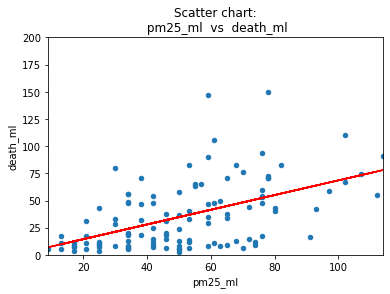

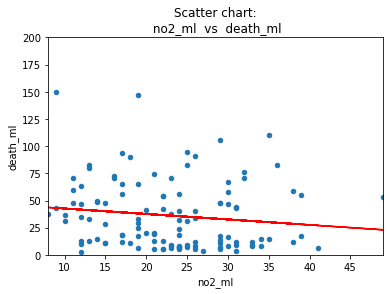

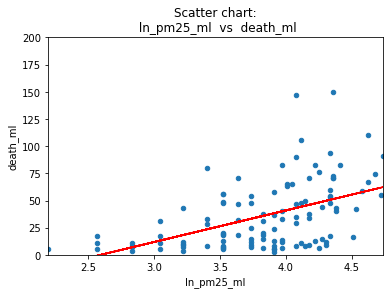

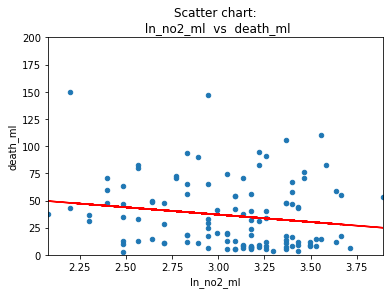

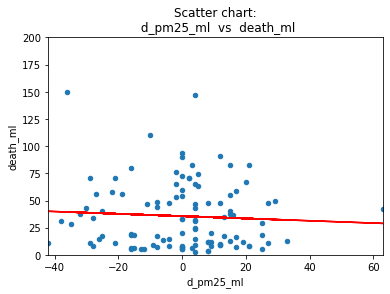

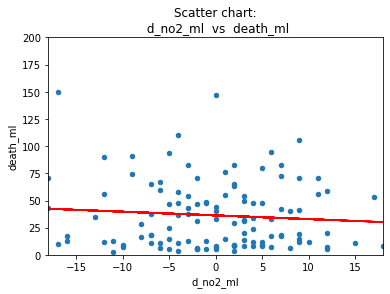

In [33]:
# 4.1.4.1) Deaths vs PM2.5
# scatterplot(df_final, 'pm25_ml', 'death_ml', xlim_min = 20, xlim_max = 78)
scatterplot(df_final, 'pm25_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'pm25_ml_ip', 'death_ml_ip', xlim_min = 20, xlim_max = 78)
# scatterplot(df_final, 'pm25_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)

# 4.1.4.2) Deaths vs NO2
# scatterplot(df_final, 'no2_ml', 'death_ml', xlim_min = 8, xlim_max = 43)
scatterplot(df_final, 'no2_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'no2_ml_ip', 'death_ml_ip', xlim_min = 8, xlim_max = 43)
# scatterplot(df_final, 'no2_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)

# 4.1.4.3) Deaths vs lnPM2.5
# scatterplot(df_final, 'ln_pm25_ml', 'death_ml', xlim_min = 3, xlim_max = 4.36)
scatterplot(df_final, 'ln_pm25_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'ln_pm25_ml_ip', 'death_ml_ip', xlim_min = 3, xlim_max = 4.36)
# scatterplot(df_final, 'ln_pm25_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)

# 4.1.4.4) Deaths vs lnNO2
# scatterplot(df_final, 'ln_no2_ml', 'death_ml', xlim_min = 2.08, xlim_max = 3.76)
scatterplot(df_final, 'ln_no2_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'ln_no2_ml_ip', 'death_ml_ip', xlim_min = 2.08, xlim_max = 3.76)
# scatterplot(df_final, 'ln_no2_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)

# 4.1.4.5) Deaths vs dPM2.5
# scatterplot(df_final, 'd_pm25_ml', 'death_ml', xlim_min = -1, xlim_max = 0.78)
scatterplot(df_final, 'd_pm25_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'd_pm25_ml_ip', 'death_ml_ip', xlim_min = -1, xlim_max = 0.78)
# scatterplot(df_final, 'd_pm25_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)

# 4.1.4.6) Deaths vs dNO2
# scatterplot(df_final, 'd_no2_ml', 'death_ml', xlim_min = -1, xlim_max = 1.75)
scatterplot(df_final, 'd_no2_ml', 'death_ml', ylim_min = 0, ylim_max = 200)
# scatterplot(df_final, 'd_no2_ml_ip', 'death_ml_ip', xlim_min = -1, xlim_max = 1.75)
# scatterplot(df_final, 'd_no2_ml_ip', 'death_ml_ip', ylim_min = 0, ylim_max = 200)


### 4.1.5) Tokyo

<AxesSubplot:title={'center':'Scatter chart:\n d_no2_tk  vs  death_tk'}, xlabel='d_no2_tk', ylabel='death_tk'>

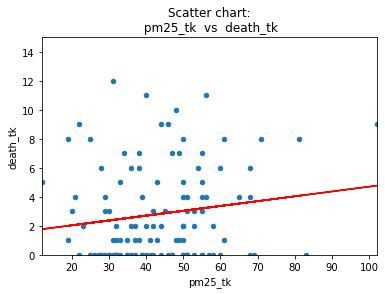

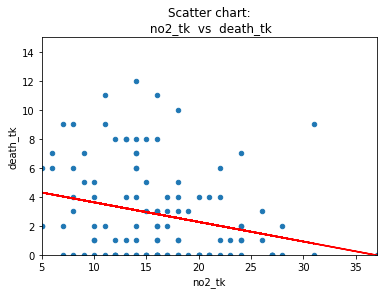

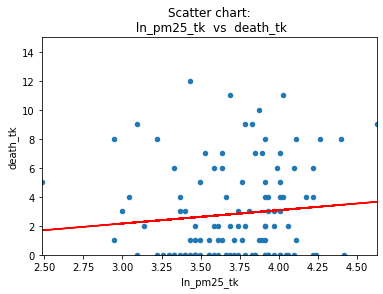

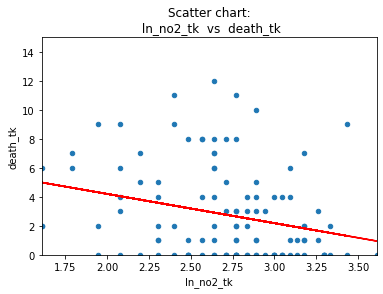

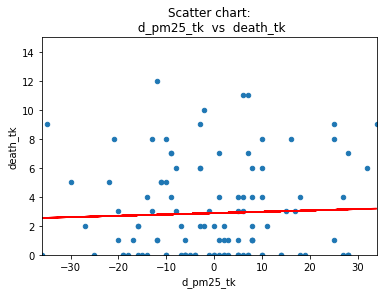

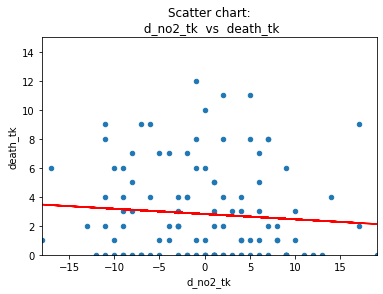

In [34]:
# 4.1.5.1) Deaths vs PM2.5
# scatterplot(df_final, 'pm25_tk', 'death_tk', xlim_min = 20, xlim_max = 78)
scatterplot(df_final, 'pm25_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'pm25_tk_ip', 'death_tk_ip', xlim_min = 20, xlim_max = 78)
# scatterplot(df_final, 'pm25_tk_ip', 'death_tk_ip')

# 4.1.5.2) Deaths vs NO2
# scatterplot(df_final, 'no2_tk', 'death_tk', xlim_min = 8, xlim_max = 43)
scatterplot(df_final, 'no2_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'no2_tk_ip', 'death_tk_ip', xlim_min = 8, xlim_max = 43)
# scatterplot(df_final, 'no2_tk_ip', 'death_tk_ip')

# 4.1.5.3) Deaths vs lnPM2.5
# scatterplot(df_final, 'ln_pm25_tk', 'death_tk', xlim_min = 3, xlim_max = 4.36)
scatterplot(df_final, 'ln_pm25_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'ln_pm25_tk_ip', 'death_tk_ip', xlim_min = 3, xlim_max = 4.36)
# scatterplot(df_final, 'ln_pm25_tk_ip', 'death_tk_ip')

# 4.1.5.4) Deaths vs lnNO2
# scatterplot(df_final, 'ln_no2_tk', 'death_tk', xlim_min = 2.08, xlim_max = 3.76)
scatterplot(df_final, 'ln_no2_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'ln_no2_tk_ip', 'death_tk_ip', xlim_min = 2.08, xlim_max = 3.76)
# scatterplot(df_final, 'ln_no2_tk_ip', 'death_tk_ip')

# 4.1.5.5) Deaths vs dPM2.5
# scatterplot(df_final, 'd_pm25_tk', 'death_tk', xlim_min = -1, xlim_max = 0.78)
scatterplot(df_final, 'd_pm25_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'd_pm25_tk_ip', 'death_tk_ip', xlim_min = -1, xlim_max = 0.78)
# scatterplot(df_final, 'd_pm25_tk_ip', 'death_tk_ip')

# 4.1.5.6) Deaths vs dNO2
# scatterplot(df_final, 'd_no2_tk', 'death_tk', xlim_min = -1, xlim_max = 1.75)
scatterplot(df_final, 'd_no2_tk', 'death_tk', ylim_min = 0, ylim_max = 15)
# scatterplot(df_final, 'd_no2_tk_ip', 'death_tk_ip', xlim_min = -1, xlim_max = 1.75)
# scatterplot(df_final, 'd_no2_tk_ip', 'death_tk_ip')


## 4.2) Plotting by date

In [35]:
# 4.2.1) Create a function to plot deaths by date

def plot_death_by_date(df, x_column, y_column): 
    
    # Create temporary dataframe that removes NAs
    df_temp = df.loc[:, [x_column, y_column]].dropna()
    
    plot = px.line(df_temp, x = df_temp[x_column], y = df_temp[y_column])

    plot.update_layout(title = f"Timeline of {y_column}",
                  xaxis_title = x_column, yaxis_title = y_column,  
                  legend = dict(yanchor = "top", y = 0.99, xanchor = "right", x = 0.99))

    plot.update_traces(line_color = 'darkcyan', line_width = 3)

    plot.add_trace(go.Scatter(x = df_temp[x_column], y = [200]*len(df_temp), 
                          mode = 'lines', name = '200 count line', 
                          line = dict(dash = 'dash', color = 'gray')))

    plot.add_trace(go.Scatter(x = df_temp[x_column], y = [400]*len(df_temp), 
                          mode = 'lines', name = '400 count line', 
                          line = dict(dash = 'dash', color = 'maroon')))

    plot.add_trace(go.Scatter(x = df_temp[x_column], y = [600]*len(df_temp), 
                          mode = 'lines', name = '600 count line', 
                          line = dict(dash = 'dash', color = 'black')))
    
    return(plot)

In [36]:
# 4.2.2) Create a function to plot pollutant concentration by date

def plot_pollutant_concentration_by_date(df, x_column, poll1, poll2):
    
    # Create temporary dataframe that removes NAs
    df_temp = df.loc[:, [x_column, poll1, poll2]].dropna()
    
    plot = px.line(df_temp, x = x_column, y = poll1)

    plot.add_trace(go.Scatter(x = df_temp[x_column], y = df_temp[poll1], 
                        mode = 'lines', name = poll1, line_color = 'darkorange', line_width = 2))

    plot.add_trace(go.Scatter(x = df_temp[x_column], y = df_temp[poll2], 
                        mode = 'lines', name = poll2, line_color = 'mediumblue', line_width = 2))

    plot.update_layout(title = f"Timeline of {poll1} and {poll2} concentration levels", 
                  xaxis_title = x_column, yaxis_title = '$\\mu g / m^{3}$', 
                  legend = dict(yanchor = "top", y = 0.99, xanchor = "right", x = 0.99))
    
    return(plot)

In [37]:
# 4.2.3) Create a function that shows deaths by date and pollutant concentration in a color code

def plot_death_vs_pollutant_by_date(df, x_column, y_column, color_column):

    # Create temporary dataframe that removes NAs
    df_temp = df.loc[:, [x_column, y_column, color_column]].dropna()
    
    plot = px.bar(df_temp.sort_values(y_column, ascending = False), 
                  x = x_column, y = y_column, color = color_column, 
                  title = f"Timeline of: {y_column} vs {color_column}",
                  color_discrete_sequence = px.colors.qualitative.Vivid)

    plot.update_traces(textposition = 'outside')
    plot.update_layout(uniformtext_minsize = 8, uniformtext_mode = 'hide', xaxis_title = x_column, yaxis_title = y_column)
    
    return(plot)

### 4.2.2) New York

In [38]:
# 4.2.2.1) Timeline of confirmed deaths
plot_death_by_date(df_final, 'date', 'death_ny')

In [39]:
# 4.2.2.2) Timeline of pollutant concentration levels
plot_pollutant_concentration_by_date(df_final, 'date', 'no2_ny', 'pm25_ny')
# plot_pollutant_concentration_by_date(df_final, 'date', 'no2_ny_ip', 'pm25_ny_ip')

In [40]:
# 4.2.2.3) Timeline of death vs pollutant
plot_death_vs_pollutant_by_date(df_final, 'date', 'death_ny', 'pm25_ny')
# plot_death_vs_pollutant_by_date(df_final, 'date', 'death_ny_ip', 'pm25_ny_ip')

### 4.2.3) Milan

In [41]:
# 4.2.3.1) Timeline of confirmed deaths
plot_death_by_date(df_final, 'date', 'death_ml')

In [42]:
# 4.2.3.2) Timeline of pollutant concentration levels
plot_pollutant_concentration_by_date(df_final, 'date', 'no2_ml', 'pm25_ml')
# plot_pollutant_concentration_by_date(df_final, 'date', 'no2_ml_ip', 'pm25_ml_ip')

In [43]:
# 4.2.3.3) Timeline of death vs pollutant
plot_death_vs_pollutant_by_date(df_final, 'date', 'death_ml', 'pm25_ml')
# plot_death_vs_pollutant_by_date(df_final, 'date', 'death_ml_ip', 'pm25_ml_ip')

### 4.2.4) Tokyo

In [44]:
# 4.2.4.1) Timeline of confirmed deaths
plot_death_by_date(df_final, 'date', 'death_tk')

In [45]:
# 4.2.4.2) Timeline of pollutant concentration levels
plot_pollutant_concentration_by_date(df_final, 'date', 'no2_tk', 'pm25_tk')
# plot_pollutant_concentration_by_date(df_final, 'date', 'no2_tk_ip', 'pm25_tk_ip')

In [46]:
# 4.2.4.3) Timeline of death vs pollutant
plot_death_vs_pollutant_by_date(df_final, 'date', 'death_tk', 'pm25_tk')
# plot_death_vs_pollutant_by_date(df_final, 'date', 'death_tk_ip', 'pm25_tk_ip')

# 5) Prediction with Artificial Neural Networks (ANNs)
## 5.1) Setup

In [47]:
# We are going to use TensorFlow and Keras, the main library for building Neural Networks
!pip install Keras-Preprocessing

In [48]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [49]:
# Now we can import on our notebook the main modules from TensorFlow Keras and start coding:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import shap

## 5.2 Model Design

### Neural Network

In [50]:
import numpy as np
import tensorflow as tf
#The data type of the input to a TensorFlow model should be a float, as most TensorFlow operations are performed on float values, so we replace int() values to float()
df_final_temp = df_final.loc[:,['pm25_ny', 'no2_ny', 'ln_pm25_ny', 'ln_no2_ny', 'd_pm25_ny','d_no2_ny','ln_pm25_ny_ip','d_death_ny_ip','death_ny']].dropna()
print(df_final_temp) #116 rows -> 75 rows

      pm25_ny  no2_ny  ln_pm25_ny  ln_no2_ny  d_pm25_ny  d_no2_ny  \
2254       13       8    2.564949   2.079442        -24        -2   
2255       35       7    3.555348   1.945910         22        -1   
2256       44      13    3.784190   2.564949          9         6   
2257       51       3    3.931826   1.098612          7       -10   
2264       28       7    3.332205   1.945910          0         0   
...       ...     ...         ...        ...        ...       ...   
2357       26      14    3.258097   2.639057          9         4   
2358       23      10    3.135494   2.302585         -3        -4   
2359       20       7    2.995732   1.945910         -3        -3   
2366       47       9    3.850148   2.197225         11        -5   
2367       37      25    3.610918   3.218876        -10        16   

      ln_pm25_ny_ip  d_death_ny_ip  death_ny  
2254       2.564949              0         0  
2255       3.555348              0         0  
2256       3.784190           

<AxesSubplot:>

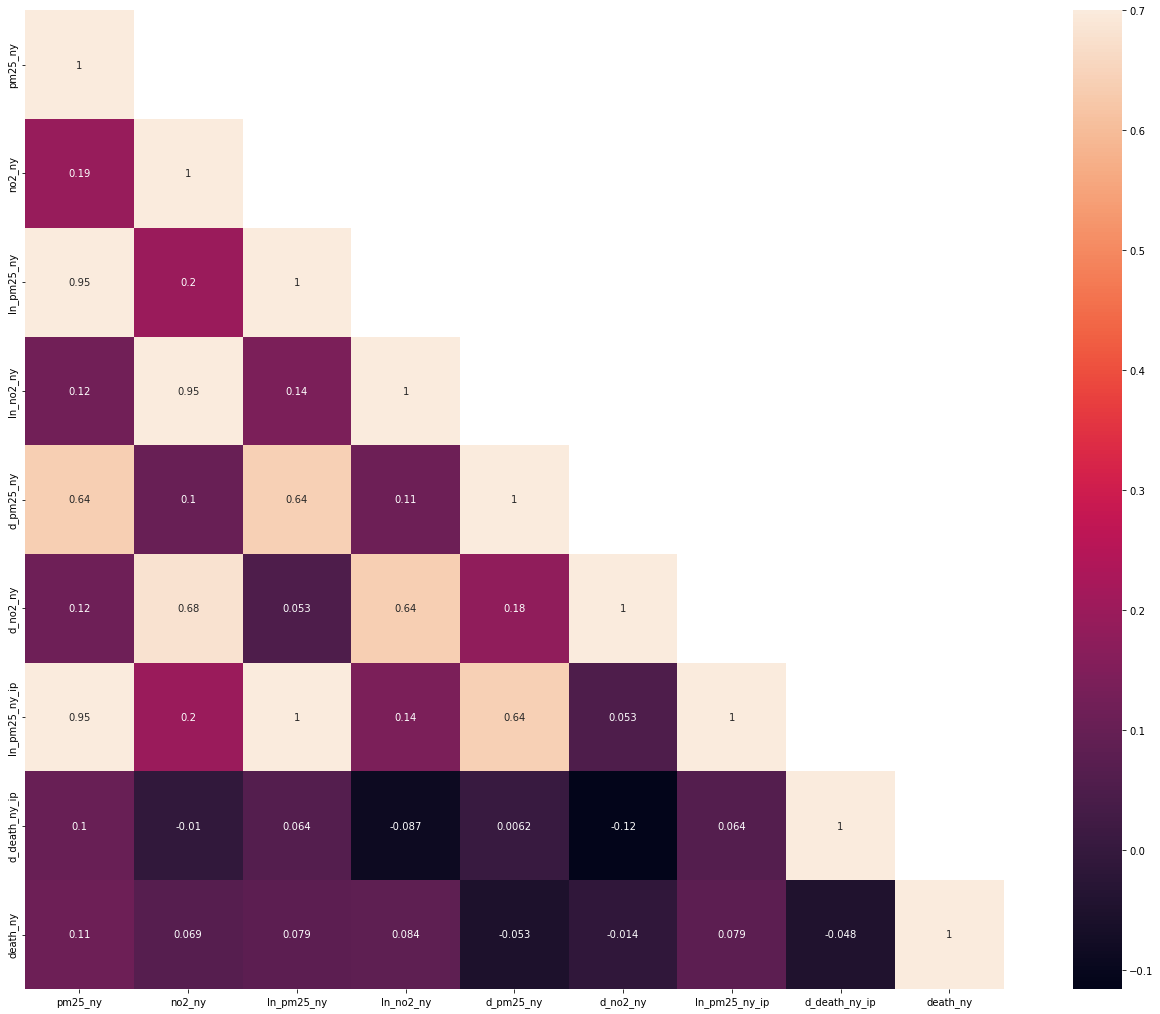

In [127]:
import seaborn as sns
correlation_map = df_final_temp[df_final_temp.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax = plt.subplots()
fig.set_size_inches(25,18)
sns.heatmap(correlation_map, mask = obj, vmax=.7, square = True, annot = True)

In [51]:
X = df_final_temp.loc[:,['pm25_ny', 'no2_ny', 'ln_pm25_ny', 'ln_no2_ny', 'd_pm25_ny','d_no2_ny','ln_pm25_ny_ip','d_death_ny_ip']]
y = df_final_temp.loc[:,['death_ny']]
#To convert a NumPy array to a TensorFlow tensor,
X = tf.convert_to_tensor(X.values, dtype=tf.float64)
y = tf.convert_to_tensor(y.values, dtype=tf.float64)

In [105]:
# We are building a Neural Network with TensorFlow is with the Sequential class of Keras.
n_features = X.shape[1]

# DeepNN
### layer input
inputs = layers.Input(name="input", shape=(n_features,))
### hidden layer 1
h1 = layers.Dense(name="h1", units=int(round((n_features+1)/2)), activation='relu')(inputs)
h1 = layers.Dropout(name="drop1", rate=0.2)(h1)
### hidden layer 2
h2 = layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu')(h1)
h2 = layers.Dropout(name="drop2", rate=0.2)(h2)
### hidden layer 3
h3 = layers.Dense(name="h3", units=int(round((n_features+1)/8)), activation='relu')(h2)
h3 = layers.Dropout(name="drop3", rate=0.2)(h3)
### layer output
outputs = layers.Dense(name="output", units=1, activation='relu')(h3)
model = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")

In [106]:
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8)]               0         
                                                                 
 h1 (Dense)                  (None, 4)                 36        
                                                                 
 drop1 (Dropout)             (None, 4)                 0         
                                                                 
 h2 (Dense)                  (None, 2)                 10        
                                                                 
 drop2 (Dropout)             (None, 2)                 0         
                                                                 
 h3 (Dense)                  (None, 1)                 3         
                                                                 
 drop3 (Dropout)             (None, 1)                 0    

In [107]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X.numpy(),y.numpy(), test_size =0.2, random_state = 0)

In [116]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
print("Minimum value of X_train:", np.min(X_train))
print("Maximum value of X_train:", np.max(X_train))
print("Minimum value of y_train:", np.min(y_train))
print("Maximum value of y_train:", np.max(y_train))

Minimum value of X_train: 0.0
Maximum value of X_train: 1.0000000000000002
Minimum value of y_train: 0.0
Maximum value of y_train: 598.0


In [117]:
X_train.shape

(60, 8)

In [118]:
y_train.shape

(60, 1)

### Architecture

In [119]:
# We are writing  a function to plot the structure of an Artificial Neural Network from its TensorFlow model based on:
#[https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0]
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

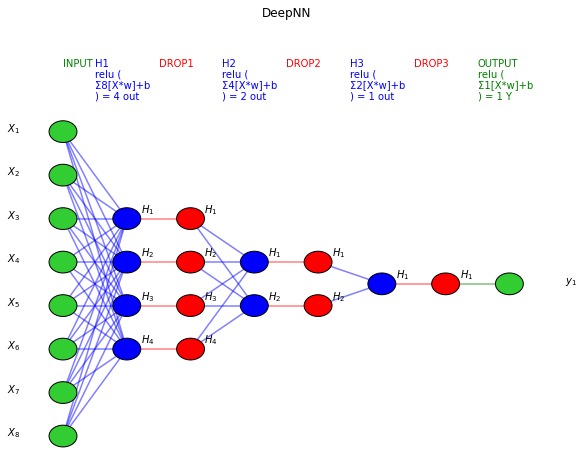

In [120]:
visualize_nn(model, description=True, figsize=(10,8))

### Define metrics

In [121]:
# define metrics
def R2(y, y_hat):
    ss_res =  K.sum(K.square(y - y_hat)) 
    ss_tot = K.sum(K.square(y - K.mean(y))) 
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

# compile the neural network
model.compile(optimizer='adam', loss='mean_absolute_error', 
              metrics=[R2])

### Training

In [122]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=8)

In [123]:
# train/validation
training = model.fit(x = X_train, y= y_train, batch_size=32, epochs=100,shuffle=True, validation_split=0.1,callbacks=[es])

Epoch 1/100
2/2 [==============================] - 1s 193ms/step - loss: 164.4426 - R2: -0.8565 - val_loss: 55.6134 - val_R2: -1.4816
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 164.4661 - R2: -0.8547 - val_loss: 55.6023 - val_R2: -1.4810
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 164.5679 - R2: -0.9717 - val_loss: 55.5911 - val_R2: -1.4804
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 164.4185 - R2: -0.9509 - val_loss: 55.5795 - val_R2: -1.4798
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 164.4832 - R2: -0.8463 - val_loss: 55.5678 - val_R2: -1.4791
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 164.4062 - R2: -0.8612 - val_loss: 55.5558 - val_R2: -1.4785
Epoch 7/100
2/2 [==============================] - 0s 26ms/step - loss: 164.4812 - R2: -0.9447 - val_loss: 55.5437 - val_R2: -1.4778
Epoch 8/100
2/2 [==============================] - 0s 26ms/step - lo

### Plots

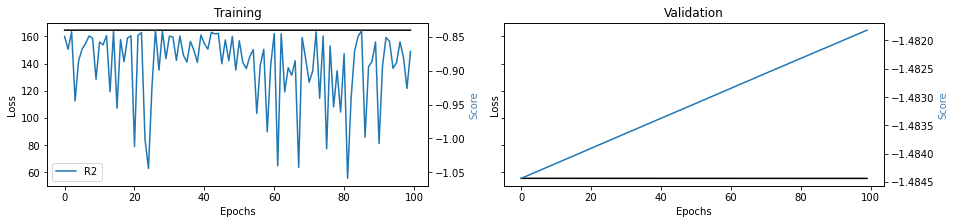

In [63]:
# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

## training    
ax[0].set(title="Training")   
ax11 = ax[0].twinx()

ax[0].plot(training.history['loss'], color='black')   
ax[0].set_xlabel('Epochs')    
ax[0].set_ylabel('Loss', color='black')    
for metric in metrics:        
    ax11.plot(training.history[metric], label=metric)   
    ax11.set_ylabel("Score", color='steelblue')    
ax11.legend()

## validation    
ax[1].set(title="Validation")    
ax22 = ax[1].twinx()    
ax[1].plot(training.history['val_loss'], color='black')   
ax[1].set_xlabel('Epochs')    
ax[1].set_ylabel('Loss', color='black')    
for metric in metrics:          
    ax22.plot(training.history['val_'+metric], label=metric)   
    ax22.set_ylabel("Score", color="steelblue")    
plt.show()

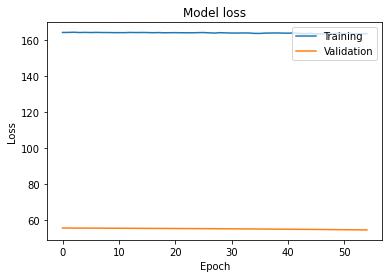

In [126]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [64]:
def explainer_shap(model, X_names, X_instance, X_train=None, task="classification", top=10):
    ## create explainer
    ### machine learning
    if X_train is None:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_instance)
    ### deep learning
    else:
        explainer = shap.DeepExplainer(model, data=X_train[:100])
        shap_values = explainer.shap_values(X_instance.reshape(1,-1))[0].reshape(-1)

    ## plot
    ### classification
    if task == "classification":
        shap.decision_plot(explainer.expected_value, shap_values, link='logit', feature_order='importance',
                           features=X_instance, feature_names=X_names, feature_display_range=slice(-1,-top-1,-1))
    ### regression
    else:
        shap.waterfall_plot(explainer.expected_value[0], shap_values, 
                            features=X_instance, feature_names=X_names, max_display=top)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


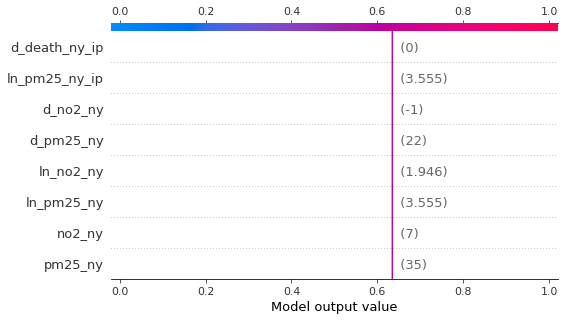

In [65]:
X_np = X.numpy()
list_feature_names = ['pm25_ny', 'no2_ny', 'ln_pm25_ny', 'ln_no2_ny', 'd_pm25_ny','d_no2_ny','ln_pm25_ny_ip','d_death_ny_ip']
i = 1
explainer_shap(model, X_names=list_feature_names, X_instance=X_np[i], X_train=X_np, task="classification", top=10)